In [93]:
from selenium import webdriver
ch_driver=webdriver.Chrome('C:/Users/user/chromedriver.exe')  

In [94]:
front_url = 'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid2=322&sid1=104&date='  

In [95]:
# 입력값(year_date) 에 해당하는 날짜의 기사 링크를 뽑아내는 함수
def get_article_link_list(year_date:int):    
    
    ch_driver.get(front_url+ str(year_date))                    
    section=ch_driver.find_element_by_class_name('newsflash_body')
    lists=section.find_elements_by_tag_name('li')
    
    article_link_list=[]
    for li in lists:
        dt=li.find_element_by_tag_name('dt')
        link=dt.find_element_by_tag_name('a').get_attribute('href')
        article_link_list.append(link)
        
    return article_link_list

In [96]:
get_article_link_list(20190124)

['https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706059',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=056&aid=0010664711',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=052&aid=0001245343',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706058',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=056&aid=0010664710',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706057',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706056',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706055',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706054',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=322&oid=055&aid=0000706053',


In [113]:
# 링크를 모아놓은 리스트에서 각각의 링크에 대해 header(기사제목)와 body(기사본문) string으로 return
body_list = []
def get_body_from_link(link_list):
    for one in link_list:
        ch_driver.get(one)
        all=ch_driver.find_element_by_id('main_content')
        
        header=all.find_element_by_class_name('article_header')
        header=header.text.split('\n')[0].strip(" \\")                
        body_list.append(header)
        
        body=all.find_element_by_id('articleBodyContents')
        body=body.text.split('\n\n')[:-5]
        str(body).strip('[]')
        body_list.append(body)
                                                     #body: text
        result_list=str(body_list).strip('[]')
    return result_list

In [114]:
get_body_from_link(get_article_link_list(20190124))

'\'트럼프 "조만간 있을 2차 정상회담 기대…잠재력 많아"\', ["도널드 트럼프 미국 대통령이 북한 문제와 관련해 성과가 없다는 언론 보도들을 \'가짜뉴스\'로 일축하며 내달말로 예정된 2차 북미정상회담에 대한 기대감을 거듭 표했습니다.", \'트럼프 대통령은 현지시간 24일 트위터에 올린 글에서 "가짜 뉴스 매체는 \\\'김정은과의 1차 정상회담에서 이뤄진 게 별로 없다\\\'고 말하는 걸 좋아한다"며 "잘못됐다!"고 반박했습니다.\', \'이어 "북한에 대해 아무것도 하지 않고 완패만 당하고 큰 전쟁이 일어날 뻔했던 지난 40년 이후 15개월이라는 짧은 기간에 관계는 구축됐고 인질과 유해들은 원래 그들이 속했던 고국으로 돌아왔다"고 자평했습니다.\', \'그러면서 "더 이상 로켓과 미사일이 일본 쪽을 향해서든 그 어느 쪽으로든 발사되지 않고 있으며, 가장 중요한 것은 핵 실험이 없다는 것"이라고 덧붙였습니다.\', \'트럼프 대통령은 "이는 일찍이 북한에 대해 성취했던 그 어떤 것을 능가하는 것이며 가짜 뉴스도 이를 알고 있다"며 "나는 조만간 있을 또 하나의 좋은 만남을 기대한다. 많은 잠재력이 있다!"고 말했습니다.\'], \'예천군의원 폭행 피해 가이드 미국서 500만 달러 ‘고액 소송’\', [\'해외 연수 중이던 박종철 경북 예천군의회 의원으로부터 폭행을 당한 한인 가이드가 박 의원 등을 상대로 고액 소송에 나서기로 했습니다.\', \'폭행 피해를 입은 미국 현지 가이드 측 변호인은 23일(현지시각) 버지니아주 로펌 사무실에서 기자회견을 열고, 박 의원 등에 대해 고액의 손해배상을 청구할 것이라고 밝혔습니다.\', "이 변호인은 손해배상 청구액은 우리 돈으로 56억 원에 달하는 \'500만 달러 이상\'이 될 것이며, 소송 대상은 박 의원과 폭행을 방조한 군 의원, 예천군의회 등이라고 설명했습니다.", \'해당 로펌 측은 현재 캐나다 사법 당국의 수사 결과에 따라 형사소송을 진행할 것이라며 의뢰인이 입은 육체적, 정신적 피해를 보상받기 위한 민

In [115]:
#기사 본문을 file 에 저장
def write_article_body_in_file(article_link_list:list, file_name:str):  #file_name: result.txt
    try:
        with open(file_name, 'wt', encoding='utf-8') as f:
            f.write(get_body_from_link(article_link_list))
    except FileNotFoundError as ex:
        print(ex)

In [116]:
# 이 주피터파일이 열린 곳에서 article_bodies.txt 생성
write_article_body_in_file(get_article_link_list(20190124), 'article_bodies.txt')

In [117]:
import nltk

In [135]:
with open('article_bodies.txt', 'r', encoding='utf8') as f:  #encoding = 'utf8' 안해주면 에러발생
    text = f.readlines()
text=str(text).strip('[]')  

In [136]:
# t.nouns()에 들어가는 거는 string 포맷이어야 한다
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(text)
tokens_ko

['트럼프',
 '조만간',
 '차',
 '정상회담',
 '기대',
 '잠재력',
 '도널드',
 '트럼프',
 '미국',
 '대통령',
 '북한',
 '문제',
 '관련',
 '성과',
 '언론',
 '보도',
 '가짜',
 '뉴스',
 '로',
 '축하',
 '내달',
 '말로',
 '예정',
 '차',
 '북미',
 '정상회담',
 '대한',
 '대감',
 '거듭',
 '표',
 '트럼프',
 '대통령',
 '현지',
 '시간',
 '트위터',
 '글',
 '가짜',
 '뉴스',
 '매체',
 '김정은',
 '차',
 '정상회담',
 '게',
 '별로',
 '고',
 '말',
 '걸',
 '며',
 '고',
 '반박',
 '북한',
 '대해',
 '것',
 '완패',
 '전쟁',
 '지난',
 '이후',
 '개월',
 '기간',
 '관계',
 '구축',
 '인질',
 '유해',
 '원래',
 '그',
 '속',
 '고국',
 '고',
 '자평',
 '더',
 '이상',
 '로켓',
 '미사일',
 '일본',
 '쪽',
 '향',
 '그',
 '쪽',
 '발사',
 '가장',
 '것',
 '핵',
 '실험',
 '것',
 '트럼프',
 '대통령',
 '일찍이',
 '북한',
 '대해',
 '성취',
 '그',
 '것',
 '능가',
 '것',
 '가짜',
 '뉴스',
 '알',
 '며',
 '나',
 '조만간',
 '또',
 '하나',
 '만남',
 '잠재력',
 '고',
 '말',
 '예천군',
 '의원',
 '폭행',
 '피해',
 '가이드',
 '미국',
 '달러',
 '고액',
 '소송',
 '해외',
 '연수',
 '중',
 '박종철',
 '경북',
 '예천군',
 '의회',
 '의원',
 '폭행',
 '당한',
 '한인',
 '가이드',
 '박',
 '의원',
 '등',
 '상대로',
 '고액',
 '소송',
 '폭행',
 '피해',
 '미국',
 '현지',
 '가이드',
 '변호인',
 '현지',
 '시각',
 '버지니아주',
 '로펌',
 '

In [137]:
# 수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수 (len(set(ko.tokens)))를 확인한다
ko =nltk.Text(tokens_ko, name = '20190124 네이버기사')
print(len(ko.tokens)) # return number of tokens (text length)
print(len(set(ko.tokens))) # return number of unique tokens
ko.vocab()  # return frequency distribution

4152
874


FreqDist({'것': 60, '이': 46, '중국': 46, '고': 40, '북한': 38, '현지': 36, '비행': 36, '등': 34, '위협': 32, '말': 30, ...})

In [138]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

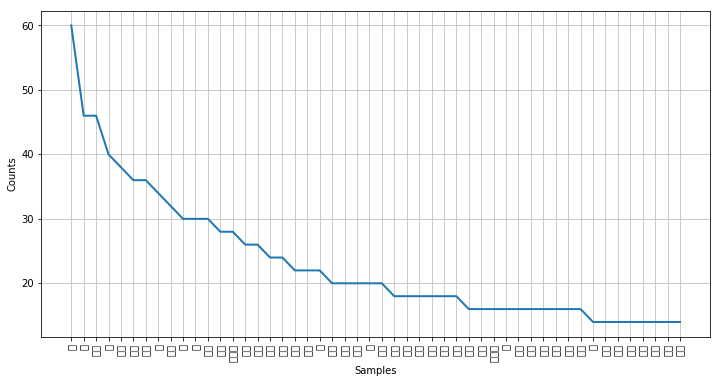

In [139]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [159]:
# \ 앞에는 \ 하나 더 붙여줘야한다
stop_words = ['.',',', '&','\\' ,'(', ')','[',']' ,'m','@','%','차','로','액','말로','하','날','범','측','은','손','날','밤',
              '예정','대감','거듭','표', '고','말','걸','며', '것','그','속','쪽','향','이', '더',
              '알','나','또','중','박','등','이','돈','원','달','군','라며','위','전','씨','채','난','주','앞서','역시','재','연','뒤']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko  # 기사들에 나와있는 단어들 리스트

['트럼프',
 '조만간',
 '정상회담',
 '기대',
 '잠재력',
 '도널드',
 '트럼프',
 '미국',
 '대통령',
 '북한',
 '문제',
 '관련',
 '성과',
 '언론',
 '보도',
 '가짜',
 '뉴스',
 '축하',
 '내달',
 '북미',
 '정상회담',
 '대한',
 '트럼프',
 '대통령',
 '현지',
 '시간',
 '트위터',
 '글',
 '가짜',
 '뉴스',
 '매체',
 '김정은',
 '정상회담',
 '게',
 '별로',
 '반박',
 '북한',
 '대해',
 '완패',
 '전쟁',
 '지난',
 '이후',
 '개월',
 '기간',
 '관계',
 '구축',
 '인질',
 '유해',
 '원래',
 '고국',
 '자평',
 '이상',
 '로켓',
 '미사일',
 '일본',
 '발사',
 '가장',
 '핵',
 '실험',
 '트럼프',
 '대통령',
 '일찍이',
 '북한',
 '대해',
 '성취',
 '능가',
 '가짜',
 '뉴스',
 '조만간',
 '하나',
 '만남',
 '잠재력',
 '예천군',
 '의원',
 '폭행',
 '피해',
 '가이드',
 '미국',
 '달러',
 '고액',
 '소송',
 '해외',
 '연수',
 '박종철',
 '경북',
 '예천군',
 '의회',
 '의원',
 '폭행',
 '당한',
 '한인',
 '가이드',
 '의원',
 '상대로',
 '고액',
 '소송',
 '폭행',
 '피해',
 '미국',
 '현지',
 '가이드',
 '변호인',
 '현지',
 '시각',
 '버지니아주',
 '로펌',
 '사무실',
 '기자회견',
 '의원',
 '대해',
 '고액',
 '손해배상',
 '청구',
 '변호인',
 '손해배상',
 '청구',
 '우리',
 '달러',
 '이상',
 '소송',
 '대상',
 '의원',
 '폭행',
 '방조',
 '의원',
 '예천군',
 '의회',
 '설명',
 '해당',
 '로펌',
 '측은',
 '현재',
 '캐나다',
 '사법',
 '당국',
 '수사',
 '결과',
 

In [160]:
ko.count('중국')

46

In [162]:
# 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다
ko.concordance('중국')

Displaying 25 of 25 matches:
입장 유럽 장기 침체 대응 위해 실시 자산 매입 프로그램 지난해 종료 중국 상무부 미국 고위 무역 협상 소통 고위 무역 협상 중국 정부 양 간 
 지난해 종료 중국 상무부 미국 고위 무역 협상 소통 고위 무역 협상 중국 정부 양 간 정상 소통 가오 펑 중국 상무부 대변인 오늘 정례 브리핑
무역 협상 소통 고위 무역 협상 중국 정부 양 간 정상 소통 가오 펑 중국 상무부 대변인 오늘 정례 브리핑 류허 부총리 방미 고위 무역 협상 관
 차관 협상 취소 보도 사실 경제 매체 무역 대표 부 관리 당초 이번 중국 차관 관리 명과 무역 협상 관련 기획 미팅 지적 재산권 규정 집행 관
 칼리지 퀸 엘리자베스 칼리지 교육 국제 관계 외교학 학사 학위 취득 중국 호주 국적 작가 중국 정보기관 구금 확인 중국 호주 국적 작가 이자 
 칼리지 교육 국제 관계 외교학 학사 학위 취득 중국 호주 국적 작가 중국 정보기관 구금 확인 중국 호주 국적 작가 이자 중국 민주화 개혁 주장
외교학 학사 학위 취득 중국 호주 국적 작가 중국 정보기관 구금 확인 중국 호주 국적 작가 이자 중국 민주화 개혁 주장 반체제 성향 시사평론가 
 호주 국적 작가 중국 정보기관 구금 확인 중국 호주 국적 작가 이자 중국 민주화 개혁 주장 반체제 성향 시사평론가 양헝쥔 중국 방문 현지 억류
국적 작가 이자 중국 민주화 개혁 주장 반체제 성향 시사평론가 양헝쥔 중국 방문 현지 억류 호주 외교통상부 성명 통해 중국 정부 베이징 주재 호
향 시사평론가 양헝쥔 중국 방문 현지 억류 호주 외교통상부 성명 통해 중국 정부 베이징 주재 호주 대사관 통해 양헝쥔 억류 중이 정보 제공 성명
 주재 호주 대사관 통해 양헝쥔 억류 중이 정보 제공 성명 우리 무엇 중국 양자 영사 협정 이번 구금 본질 양헝쥔 대한 영사 접근권 확보 위해 
이번 구금 본질 양헝쥔 대한 영사 접근권 확보 위해 노력 강조 화춘잉 중국 외교부 대변인 인물 실제 이름 양 베이징 국가 안 전국 호주 국적 사

In [163]:
#문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있다
ko.collocations()

보헤미안 랩소디; 프랑크푸르트 통화정책; 사무실 기자회견; 도널드 트럼프; 기자회견 해상자위대; 중앙은행 기준금리; 가이드
변호인; 광둥성 광저우; 드허스트 육군사관학교; 미쉐린 최고경영자; 비밀리 결혼식; 소설가 중국어; 연방제 입헌군주국;
옥스퍼드대 우스터; 육군사관학교 옥스퍼드대; 프로그램 지난해; 트럼프 대통령; 해상자위대 초계기; 삼지연 관현악단; 안토니
구테흐스


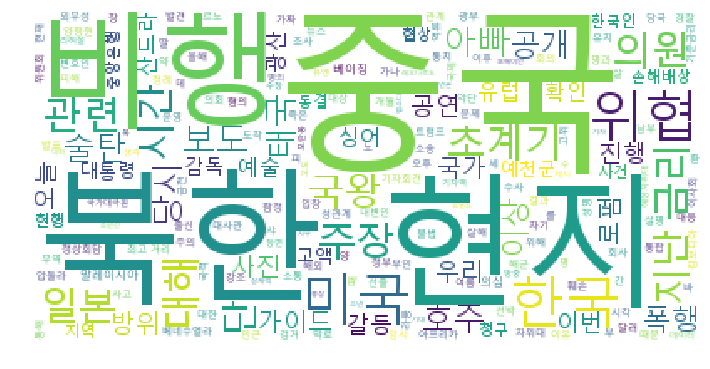

In [167]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path = '/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color= 'white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()